In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge


In [84]:
dt = pd.read_csv('../data/nam_processed_data.csv')
print(dt.head())

   bhk  area  status  price_in_USD  house_type  new  region_Agripada  \
0    2   650       1      314400.0           0    0             True   
1    1   803       0      270000.0           0    0             True   
2    1   684       0      204000.0           0    0             True   
3    1   545       0      192000.0           0    0             True   
4    2  1650       0      420000.0           0    0             True   

   region_Airoli  region_Ambernath East  region_Ambernath West  ...  \
0          False                  False                  False  ...   
1          False                  False                  False  ...   
2          False                  False                  False  ...   
3          False                  False                  False  ...   
4          False                  False                  False  ...   

   region_Vangani  region_Vasai  region_Vashi  region_Vikhroli  \
0           False         False         False            False   
1       

In [85]:
print(dt.shape)

(45343, 115)


In [86]:
print(dt.head())

   bhk  area  status  price_in_USD  house_type  new  region_Agripada  \
0    2   650       1      314400.0           0    0             True   
1    1   803       0      270000.0           0    0             True   
2    1   684       0      204000.0           0    0             True   
3    1   545       0      192000.0           0    0             True   
4    2  1650       0      420000.0           0    0             True   

   region_Airoli  region_Ambernath East  region_Ambernath West  ...  \
0          False                  False                  False  ...   
1          False                  False                  False  ...   
2          False                  False                  False  ...   
3          False                  False                  False  ...   
4          False                  False                  False  ...   

   region_Vangani  region_Vasai  region_Vashi  region_Vikhroli  \
0           False         False         False            False   
1       

In [87]:
X = dt.drop(['price_in_USD'], axis = 'columns')
Y = dt.price_in_USD


In [88]:
print(Y.shape)

(45343,)


In [95]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
X_k, X_val, Y_k, Y_val = train_test_split(X, Y, test_size=0.3, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val = scaler.transform(X_val)

reg_lasso_cv = LassoCV(cv=5, random_state=0).fit(X_train_scaled, Y_train)

# In ra alpha tốt nhất
print(f"Best alpha: {reg_lasso_cv.alpha_}")



Best alpha: 157.20711269357932


In [90]:
# Khởi tạo mô hình Lasso với alpha tốt nhất
reg_lasso = Lasso(alpha=reg_lasso_cv.alpha_)
reg_lasso.fit(X_train_scaled, Y_train)

# Đánh giá mô hình trên tập kiểm tra
score = reg_lasso.score(X_test_scaled, Y_test)
print("R-squared on the test set:", score)


R-squared on the test set: 0.8677047703684972


In [91]:
Y_pred = reg_lasso.predict(X_test_scaled)

In [92]:
pred_table = pd.DataFrame(data={"actual value":Y_test, "predicted":Y_pred})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
pred_table

,actual value,predicted,difference
24961,105912.0,175590.795900,-69678.795900
40922,75588.0,44745.817931,30842.182069
12323,40800.0,10368.204656,30431.795344
5755,442800.0,567406.082748,-124606.082748
15411,388800.0,542293.015056,-153493.015056
...,...,...,...
9629,264000.0,304132.602985,-40132.602985
7325,102000.0,98144.189397,3855.810603
1218,178800.0,135904.139247,42895.860753
31936,103200.0,130010.537704,-26810.537704


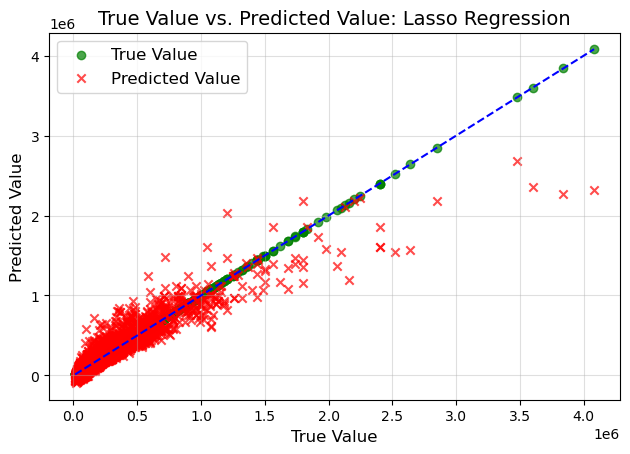

In [93]:
# Scatter plot for Y_test (green)
plt.scatter(Y_test, Y_test, c='green', marker='o', label='True Value', alpha=0.7)

# Scatter plot for Y_pred (red)
plt.scatter(Y_test, Y_pred, c='red', marker='x', label='Predicted Value', alpha=0.7)

# Add labels and title
plt.xlabel("True Value", fontsize=12)
plt.ylabel("Predicted Value", fontsize=12)
plt.title("True Value vs. Predicted Value: Lasso Regression", fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Add a diagonal line (perfect prediction line)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='blue')

# Grid for better readability
plt.grid(alpha=0.4)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


In [96]:
score = reg_lasso.score(X_val, Y_val)
print("R-squared on the validation set:", score)

R-squared on the validation set: 0.8655095050914492
